In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from CLPmodel import *

import pathlib
import fastmri
from fastmri.data import subsample
from fastmri.data import transforms as T, mri_data

from fastmri.evaluate import *
from fastmri.data.subsample import RandomMaskFunc
import torch.cuda

In [2]:
mask_func = RandomMaskFunc(center_fractions=[0.04], accelerations=[8])

def data_transform(kspace, mask, target, data_attributes, filename, slice_num):
    # Transform the data into appropriate format
    
    ifft_kspace = fastmri.ifft2c(T.to_tensor(kspace))            
    crop_kspace = T.complex_center_crop(ifft_kspace, (320,320))   #torch.Size([320, 372, 2])
    target = fastmri.complex_abs(crop_kspace)
    orig_kspace = fastmri.fft2c(crop_kspace)
    #masked_kspace, mask2 = T.apply_mask(orig_kspace, mask_func)   # Apply the mask to k-space

    mr_img =  fastmri.ifft2c(masked_kspace)
    
    
    return mr_img, masked_kspace, mask02, target

testset = mri_data.SliceDataset(
    root=pathlib.Path('./gigiox'),
    transform=data_transform,
    challenge='singlecoil'
)

In [3]:
PATH = './saved_net.pth'
#torch.save(net.state_dict(), PATH)

net = Net().cuda()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

tensor([33.3333])
tensor([0.7101])
tensor([34.0568])
tensor([0.7297])
tensor([33.3598])
tensor([0.7180])
tensor([32.7362])
tensor([0.6991])
tensor([32.0710])
tensor([0.6767])
tensor([31.2315])
tensor([0.6604])
tensor([30.8244])
tensor([0.6670])
tensor([31.4276])
tensor([0.6811])
tensor([33.2524])
tensor([0.7541])
tensor([33.7587])
tensor([0.7723])
tensor([33.5326])
tensor([0.7741])
tensor([33.8268])
tensor([0.7953])
tensor([35.2469])
tensor([0.8345])
tensor([30.7128])
tensor([0.7145])
tensor([30.1173])
tensor([0.6564])
tensor([30.1413])
tensor([0.6971])
tensor([29.1071])
tensor([0.6139])
tensor([29.3103])
tensor([0.6598])
tensor([28.6563])
tensor([0.6444])
tensor([28.8249])
tensor([0.6893])
tensor([29.2181])
tensor([0.7291])
tensor([27.4706])
tensor([0.7153])
tensor([28.2387])
tensor([0.7327])
tensor([26.3842])
tensor([0.6874])
tensor([26.3958])
tensor([0.6793])
tensor([26.0443])
tensor([0.7063])
tensor([24.6828])
tensor([0.6106])
tensor([24.9148])
tensor([0.6495])
tensor([25.2169])
te

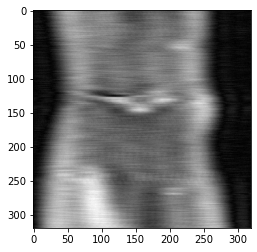

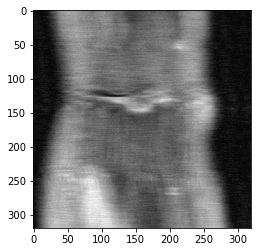

In [4]:
i=0

psnr = PSNR()
ssim = SSIM()

for mr_img, masked_kspace, mask, target in testset:
    
    input1 = mr_img.unsqueeze(0).unsqueeze(0)
    input2 = masked_kspace.unsqueeze(0).unsqueeze(0)
    mask = mask.unsqueeze(0).unsqueeze(2)
    
    outputs = net(input1.cuda(), input2.cuda(), mask.cuda())
    
    #sampled_image = fastmri.ifft2c(outputs[0][0])  
    abs1 = fastmri.complex_abs(outputs[0][0])
    #abs2 = (target).cuda()
    
    print(psnr(abs1, target.cuda()))
    print(ssim(abs1, target.cuda()))
    
    if i==15:
        fig = plt.figure()
        plt.imshow(abs1.cpu().detach().numpy(), cmap='gray')
        
        fig = plt.figure()
        plt.imshow(target.cpu().detach().numpy(), cmap='gray')
    #plt.savefig('pippo'+str(i)+'.jpg')
    
    i += 1
    pass